### Quantum teleportation

in Qiskit

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit_ibm_runtime import Sampler, QiskitRuntimeService
from qiskit_aer import Aer
import numpy as np
import random

%matplotlib inline

In [9]:
# Let's create a random qubit, by assigning random amplitudes

α1 = random.random() * 2 - 1
α2 = random.random() * 2 - 1
β1 = random.random() * 2 - 1
β2 = random.random() * 2 - 1

norm = np.sqrt(α1**2 + α2**2 + β1**2 + β2**2)

c1 = complex(α1 / norm, α2 / norm)
c2 = complex(β1 / norm, β2 / norm)

psi = QuantumRegister(1, "psi")
bell = QuantumRegister(2, "bell")
cr = ClassicalRegister(2, "cr")

qc = QuantumCircuit(psi, bell, cr)
qc.initialize([c1, c2], psi)
qc.barrier()

print(f"Alice's qubit is: {c1:.5f}|0> + {c2:.5f}|1>")

Alice's qubit is: 0.64446-0.71340j|0> + 0.06445-0.26753j|1>


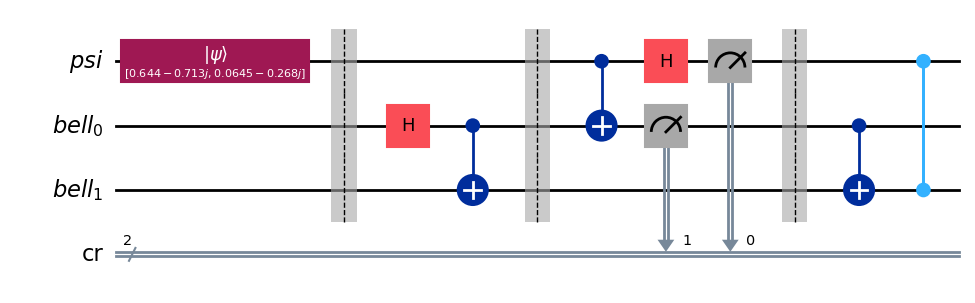

In [10]:
# Now we create a Bell pair

qc.h(bell[0])
qc.cx(bell[0], bell[1])
qc.barrier()

# Next, we apply CNOT to |psi> and Alice's part of the entangled pair
# H gate
# Alice measures her qubits and sends the results to Bob

qc.cx(psi, bell[0])
qc.h(psi)
qc.measure([psi[0], bell[0]], cr)
qc.barrier()

# Bob applies his gates depending on the values received from Alice

qc.cx(bell[0], bell[1])
qc.cz(psi, bell[1])

qc.draw("mpl");

In [22]:
# We run the circuit and access the amplitudes to check that Bob got the qubit

backend = Aer.get_backend("statevector_simulator")
job = backend.run(qc)

res= job.result().get_statevector()

print(f"Bob's qubit is: {res.data[3]:.5f}|0> + {res.data[7]:.5f}|1>")

Bob's qubit is: 0.64446-0.71340j|0> + 0.06445-0.26753j|1>
